In [ ]:
import torch
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
import argparse
import numpy as np
from urllib.request import urlretrieve
import pandas as pd
import os

def generate_image(prompt, image_index):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cpu")

    image = pipe(prompt).images[0]
    image.save(f"{image_index}.png")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    num_prompts = int(os.environ.get("NUM_PROMPTS", 1))
    parser.add_argument("--num_prompts", type=int, default=1, help="Number of prompts to process")
    args = parser.parse_args()

    table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
    urlretrieve(table_url, 'metadata.parquet')

    metadata_df = pd.read_parquet('metadata.parquet')
    prompts = metadata_df['prompt']

    prompts = list(set(prompts))

    selected_prompts = prompts[:num_prompts]

    for i, prompt in enumerate(selected_prompts, start=1):
        generate_image(prompt, i)

In [ ]:
import torch


import numpy as np
from urllib.request import urlretrieve
import pandas as pd
import os

table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
urlretrieve(table_url, 'metadata.parquet')

metadata_df = pd.read_parquet('metadata.parquet')
prompts = metadata_df['prompt']
prompts = list(set(prompts))




''

In [ ]:
from datetime import datetime
import pytz

# Capture the current time
upsampling_start_time = datetime.now(pytz.utc).strftime('%H:%M:%S')

# Define the timezone for Chicago
chicago_tz = pytz.timezone('America/Chicago')

# Convert UTC time to Chicago time
chicago_time = datetime.now(pytz.utc).astimezone(chicago_tz).strftime('%H:%M:%S')

print("Current UTC Time:", upsampling_start_time)
print("Time in Chicago:", chicago_time)


Current UTC Time: 23:22:39
Time in Chicago: 18:22:39


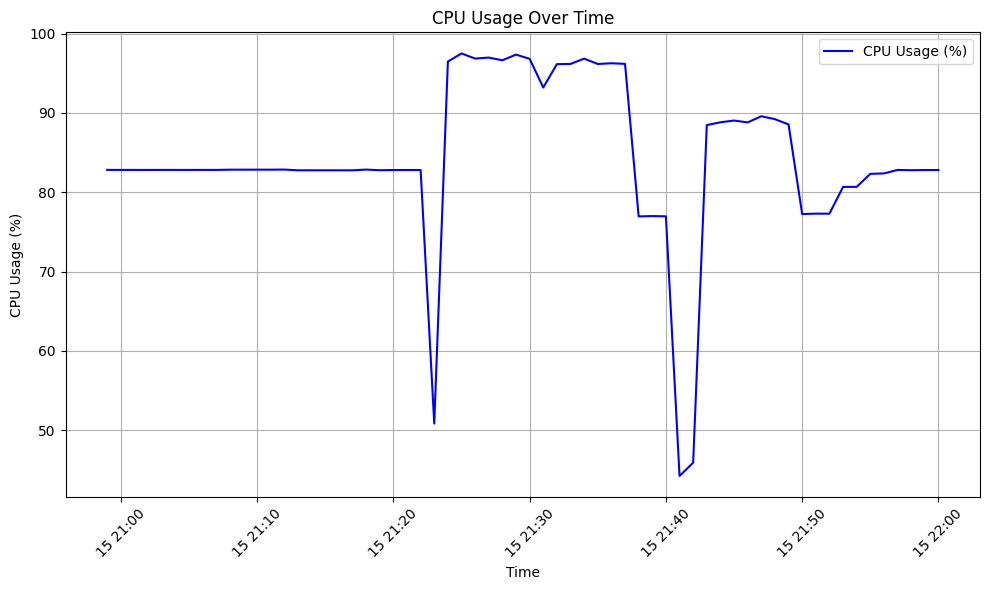

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from dateutil import parser

# Load the CPU utilization data
cpu_data_path = '/content/second_test.csv'  # Update with the path to your CSV file
try:
    cpu_df = pd.read_csv(cpu_data_path)
except UnicodeDecodeError:
    cpu_df = pd.read_csv(cpu_data_path, encoding='ISO-8859-1')  # Trying with 'latin1' encoding

# Ensure you reference the correct column name for timestamps
timestamp_column = 'TimeSeries'  # Adjust if the actual column name is different

# Preprocessing timestamps to remove the timezone description
cpu_df[timestamp_column] = cpu_df[timestamp_column].str.replace(r' GMT-0500 \(Central Daylight Time\)', '', regex=True)

# Parse the cleaned timestamps
cpu_df[timestamp_column] = cpu_df[timestamp_column].apply(lambda x: parser.parse(x))

# Set the Timestamp column as the DataFrame index
cpu_df.set_index(timestamp_column, inplace=True)

# Plotting the CPU Usage over time
plt.figure(figsize=(10, 6))
plt.plot(cpu_df.index, cpu_df['Usage'], label='CPU Usage (%)', color='blue')
plt.title('CPU Usage Over Time')
plt.xlabel('Time')
plt.ylabel('CPU Usage (%)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotate date labels for better visibility
plt.tight_layout()  # Adjust layout to make room for the rotated date labels
plt.show()


In [ ]:
#one by one
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from urllib.request import urlretrieve
from datetime import datetime

import argparse
import numpy as np
import torch
import pandas as pd
import os
import pytz

def generate_image(prompt, image_index):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cpu")

    image = pipe(prompt).images[0]
    image.save(f"{image_index}.png")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    num_prompts = int(os.environ.get("NUM_PROMPTS", 1))
    parser.add_argument("--num_prompts", type=int, default=1, help="Number of prompts to process")
    args = parser.parse_args()

    table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
    urlretrieve(table_url, 'metadata.parquet')

    metadata_df = pd.read_parquet('metadata.parquet')
    prompts = metadata_df['prompt']

    prompts = list(set(prompts))

    selected_prompts = prompts[:num_prompts]

    chicago_tz = pytz.timezone('US/Central')
    start_time = datetime.now(chicago_tz)
    print(f"Start time in: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    for i, prompt in enumerate(selected_prompts, start=1):
        start_time = datetime.now(chicago_tz)
        print(f"Start image {i} in: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")
        generate_image(prompt, i)
        end_time = datetime.now(chicago_tz)
        print(f"End image {i} in: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")

    end_time = datetime.now(chicago_tz)
    print(f"End time in : {end_time.strftime('%Y-%m-%d %H:%M:%S')}")

In [ ]:
#as a list
from diffusers import StableDiffusionPipeline, DPMSolverMultistepScheduler
from urllib.request import urlretrieve
from datetime import datetime
from torch.profiler import profile, record_function, ProfilerActivity

import argparse
import numpy as np
import torch
import pandas as pd
import os
import pytz
import torchvision.models as models

def generate_image(prompts, num_prompts):
    model_id = "runwayml/stable-diffusion-v1-5"
    pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)
    pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
    pipe = pipe.to("cpu")

    valid_prompts = []
    index = 0
    while len(valid_prompts) < num_prompts and index < len(prompts):
        prompt = prompts[index]
        token_length = len(pipe.tokenizer(prompt)['input_ids'])
        if token_length <= 77:
            valid_prompts.append(prompt)
        index += 1

    images = pipe(valid_prompts).images
    for i in range(len(valid_prompts)):
        image = images[i]
        image.save(f"image_{i}.png")

if __name__ == "__main__":
    parser = argparse.ArgumentParser()
    num_prompts = int(os.environ.get("NUM_PROMPTS", 1))
    parser.add_argument("--num_prompts", type=int, default=1, help="Number of prompts to process")
    args = parser.parse_args()

    table_url = f'https://huggingface.co/datasets/poloclub/diffusiondb/resolve/main/metadata.parquet'
    urlretrieve(table_url, 'metadata.parquet')
    metadata_df = pd.read_parquet('metadata.parquet')
    prompts = metadata_df['prompt']
    prompts = list(set(prompts))

    chicago_tz = pytz.timezone('US/Central')
    start_time = datetime.now(chicago_tz)
    print(f"Start time in: {start_time.strftime('%Y-%m-%d %H:%M:%S')}")

    generate_image(prompts, num_prompts)

    end_time = datetime.now(chicago_tz)
    print(f"End time in Chicago: {end_time.strftime('%Y-%m-%d %H:%M:%S')}")